# **Emirates Airways Reviews Project**

# **Loading the Data**

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
data = pd.read_csv("Emirates Airways Reviews.csv")

In [3]:
data.head()

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country
0,"""upgrade to business class""",12th August 2024,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai to Lisbon,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates
1,"""14 hour horrendous experience""",11th August 2024,Trip Verified,NaN,Couple Leisure,Economy Class,Delhi to Boston via Dubai,August 2024,1.0,1.0,3.0,3.0,2.0,3.0,2,no,4,We were 2 people travelling together and on...,India
2,"""not welcome and passengers are a burden""",29th July 2024,Not Verified,Boeing 777-300,Solo Leisure,Economy Class,Amsterdam to Phuket via Dubai,June 2024,2.0,1.0,4.0,2.0,3.0,3.0,2,no,5,"First time flying Emirates, was expecting a...",Netherlands
3,"""should be considered among the worst""",18th July 2024,Trip Verified,A380,Business,Economy Class,Manchester to Singapore via Dubai,July 2024,1.0,1.0,2.0,NaN,NaN,1.0,1,no,1,Ground Staff and Service Failures on Flight ...,Singapore
4,“services are very great”,13th July 2024,Not Verified,A380,Family Leisure,Economy Class,Bangkok to Hong Kong,August 2023,5.0,5.0,5.0,5.0,4.0,5.0,5,yes,10,The staff are friendly and the seat is comfo...,Hong Kong


# **Data Preprocessing**

### Understanding the Data Structure

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1540 non-null   object 
 1   Date Published   1540 non-null   object 
 2   Status           1398 non-null   object 
 3   Aircraft         1037 non-null   object 
 4   Travel Type      1540 non-null   object 
 5   Travel Class     1540 non-null   object 
 6   Route            1538 non-null   object 
 7   Date Flown       1540 non-null   object 
 8   Seating Comfort  1477 non-null   float64
 9   Staff Service    1476 non-null   float64
 10  Food Quality     1418 non-null   float64
 11  Entertainment    1380 non-null   float64
 12  WiFi             934 non-null    float64
 13  Ground Service   1501 non-null   float64
 14  Value for Money  1540 non-null   int64  
 15  Recommended      1540 non-null   object 
 16  Overall Rating   1540 non-null   int64  
 17  Review        

In [5]:
data.shape

(1540, 19)

In [6]:
data.dtypes

Title               object
Date Published      object
Status              object
Aircraft            object
Travel Type         object
Travel Class        object
Route               object
Date Flown          object
Seating Comfort    float64
Staff Service      float64
Food Quality       float64
Entertainment      float64
WiFi               float64
Ground Service     float64
Value for Money      int64
Recommended         object
Overall Rating       int64
Review              object
Country             object
dtype: object

In [7]:
data.describe()

,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Overall Rating
count,1477.000000,1476.000000,1418.000000,1380.000000,934.000000,1501.00000,1540.000000,1540.000000
mean,3.223426,2.977642,3.000000,3.704348,2.751606,2.85010,2.819481,4.814286
std,1.401284,1.592836,1.476707,1.376108,1.478815,1.59233,1.534489,3.331275
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000,1.000000,1.00000,1.000000,2.000000
50%,3.000000,3.000000,3.000000,4.000000,3.000000,3.00000,3.000000,4.000000
75%,4.000000,5.000000,4.000000,5.000000,4.000000,4.00000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,10.000000


In [8]:
data.isnull().sum()

Title                0
Date Published       0
Status             142
Aircraft           503
Travel Type          0
Travel Class         0
Route                2
Date Flown           0
Seating Comfort     63
Staff Service       64
Food Quality       122
Entertainment      160
WiFi               606
Ground Service      39
Value for Money      0
Recommended          0
Overall Rating       0
Review               0
Country              0
dtype: int64

In [10]:
data.columns

Index(['Title', 'Date Published', 'Status', 'Aircraft', 'Travel Type',
       'Travel Class', 'Route', 'Date Flown', 'Seating Comfort',
       'Staff Service', 'Food Quality', 'Entertainment', 'WiFi',
       'Ground Service', 'Value for Money', 'Recommended', 'Overall Rating',
       'Review', 'Country'],
      dtype='object')

### Handling Missing Values

In [11]:
# Handling missing values
data['Aircraft'].fillna('Unknown', inplace=True)
data['Status'].fillna('Not Verified', inplace=True)
data['Route'].fillna('Unknown', inplace=True)
data['Date Flown'].fillna('Unknown', inplace=True)

C:\Users\zafir\AppData\Local\Temp\ipykernel_848\2699296998.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Date Flown'].fillna('Unknown', inplace=True)


In [12]:
# Numerical columns
numerical_cols = ['Seating Comfort', 'Staff Service', 'Food Quality', 'Entertainment', 
                  'WiFi', 'Ground Service', 'Value for Money']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\zafir\AppData\Local\Temp\ipykernel_848\1274800192.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\zafir\AppData\Local\Temp\ipykernel_848\1274800192.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [13]:
# Drop rows with missing 'Review' or 'Title' if any
data.dropna(subset=['Review', 'Title'], inplace=True)

In [14]:
data.isnull().sum()

Title              0
Date Published     0
Status             0
Aircraft           0
Travel Type        0
Travel Class       0
Route              0
Date Flown         0
Seating Comfort    0
Staff Service      0
Food Quality       0
Entertainment      0
WiFi               0
Ground Service     0
Value for Money    0
Recommended        0
Overall Rating     0
Review             0
Country            0
dtype: int64

# **Data Type Conversion**

In [16]:
# Convert 'Data Published' to datetime
data['Data Published'] = pd.to_datetime(data['Date Published'], errors='coerce')

In [17]:
# Convert 'Recoommended' to boolean
data['Recommended'] = data['Recommended'].map({'yes':True, 'no': False})

In [18]:
# Ensure numerical column are float
for col in numerical_cols + ['Overall Rating']:
    data[col] = data[col].astype(float)

In [19]:
# Check data types
data.dtypes

Title                      object
Date Published             object
Status                     object
Aircraft                   object
Travel Type                object
Travel Class               object
Route                      object
Date Flown                 object
Seating Comfort           float64
Staff Service             float64
Food Quality              float64
Entertainment             float64
WiFi                      float64
Ground Service            float64
Value for Money           float64
Recommended                  bool
Overall Rating            float64
Review                     object
Country                    object
Data Published     datetime64[ns]
dtype: object

# **Cleaning Text Data**

### Clean text columns

In [20]:
data['Review'] = data['Review'].str.strip()

In [21]:
data['Title'] = data['Title'].str.strip()

### Remove any non-ASCII characters

In [22]:
data['Review'] = data['Review'].str.encode('ascii', 'ignore').str.decode('ascii')

In [23]:
data['Title'] = data['Title'].str.encode('ascii', 'ignore').str.decode('ascii')

# **Handling Duplicates**

### Check for duplicates

In [25]:
data.duplicated().sum()

np.int64(0)

### Drop duplicates if any

In [26]:
data.drop_duplicates(inplace=True)

In [27]:
data.duplicated().sum()

np.int64(0)

# **Exploratory Data Analysis (EDA)**

### Summary Statistics

In [28]:
data[numerical_cols + ['Overall Rating']].describe()

,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Overall Rating
count,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000
mean,3.214286,2.978571,3.000000,3.735065,2.849351,2.853896,2.819481,4.814286
std,1.373017,1.559371,1.416968,1.305734,1.157805,1.572201,1.534489,3.331275
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000
50%,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000
75%,4.000000,5.000000,4.000000,5.000000,3.000000,4.000000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


### Distribution of Ratings

In [29]:
import matplotlib.pyplot as plt

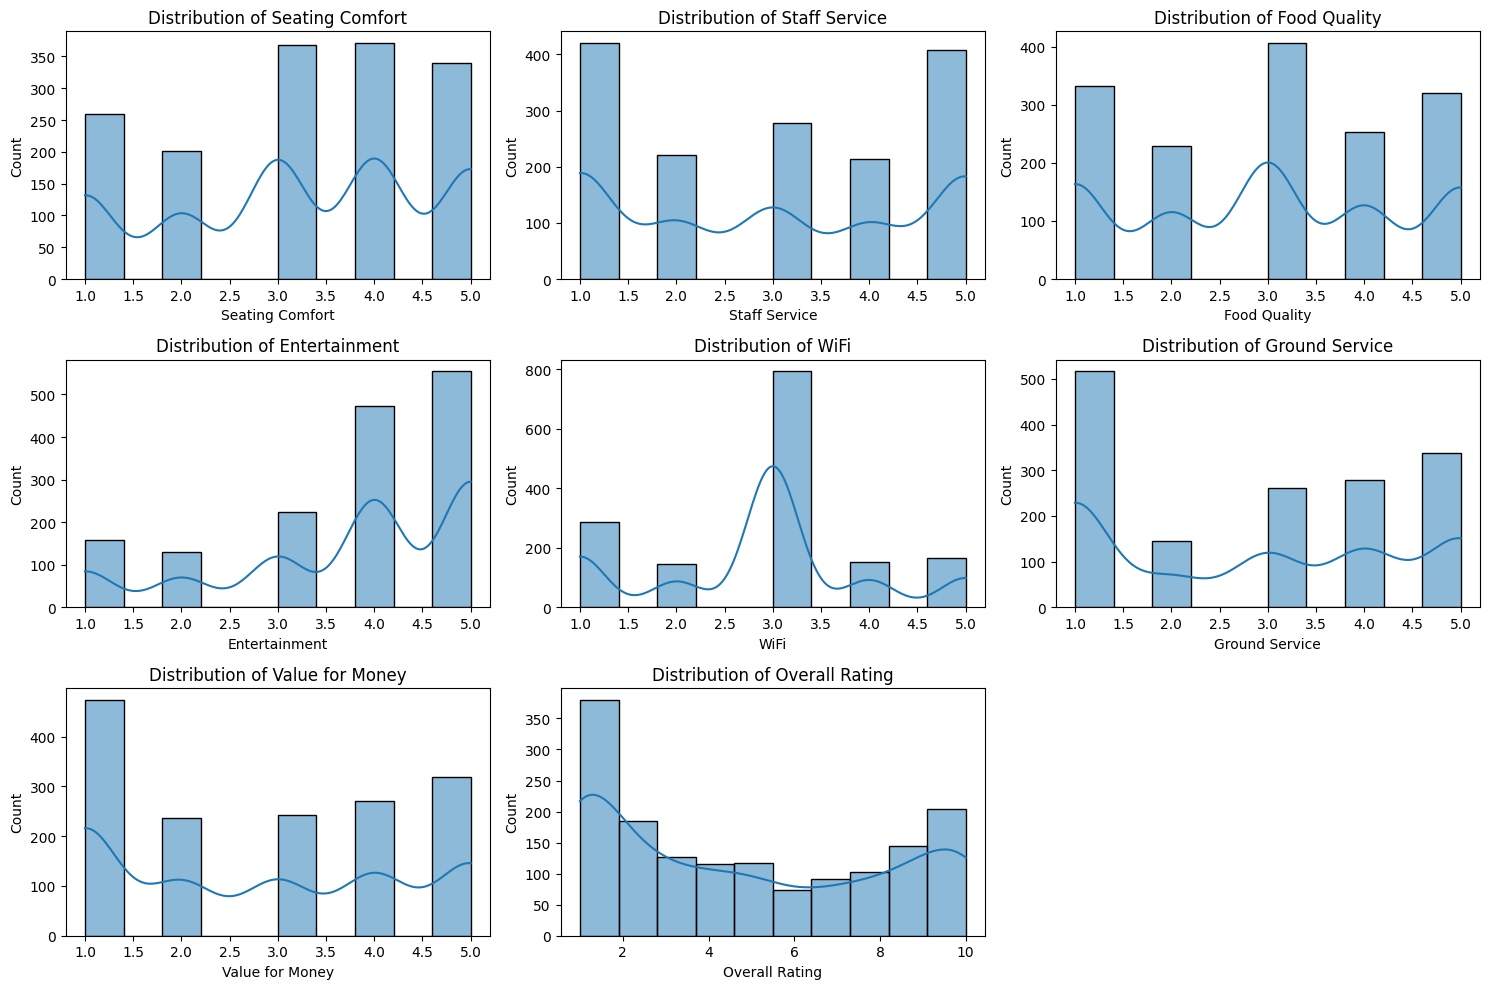

In [30]:
# Plot histograms for numerical ratings
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols + ['Overall Rating'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()    

### Correlation Analysis

In [31]:
# Correlation matrix
corr = data[numerical_cols + ['Overall Rating']].corr()

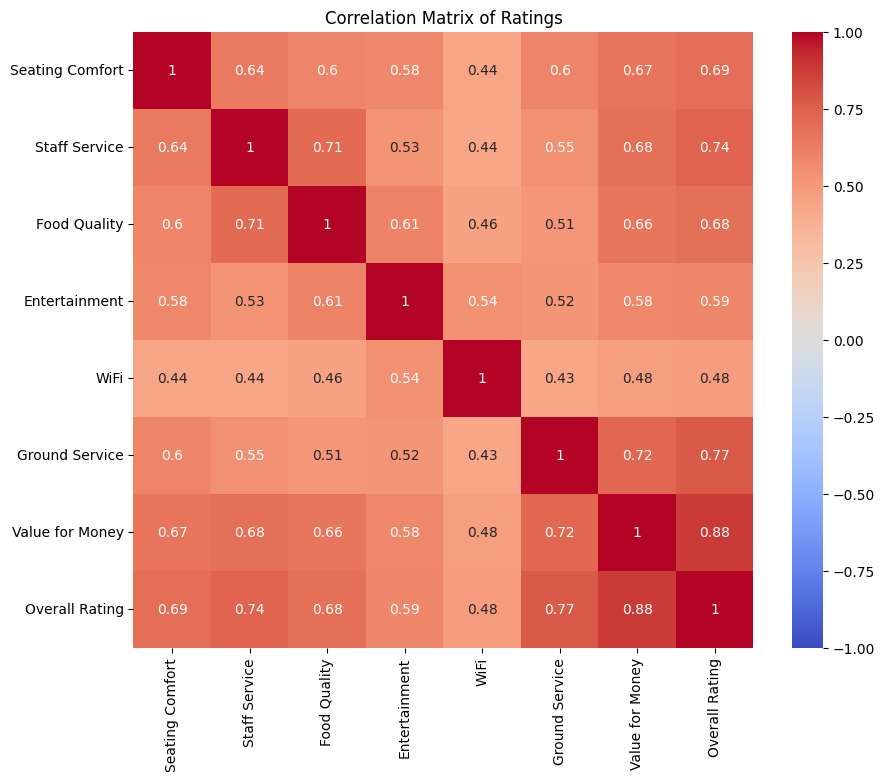

In [32]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Ratings')
plt.show()

# **Categorical Analysis**

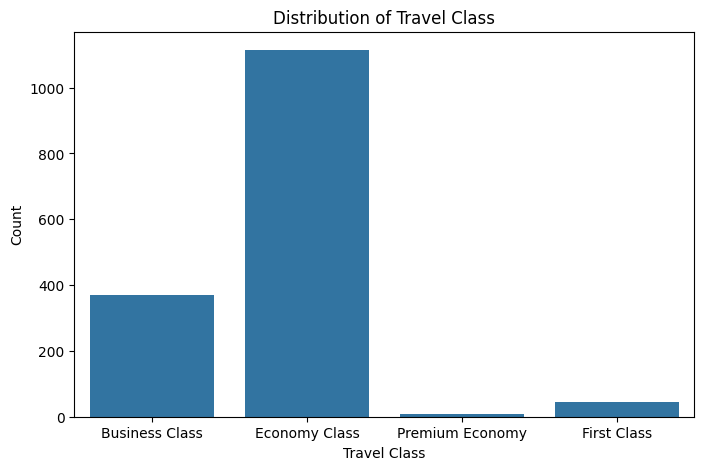

In [34]:
# Countplot for Travel Class
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Travel Class')
plt.title('Distribution of Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Count')
plt.show()

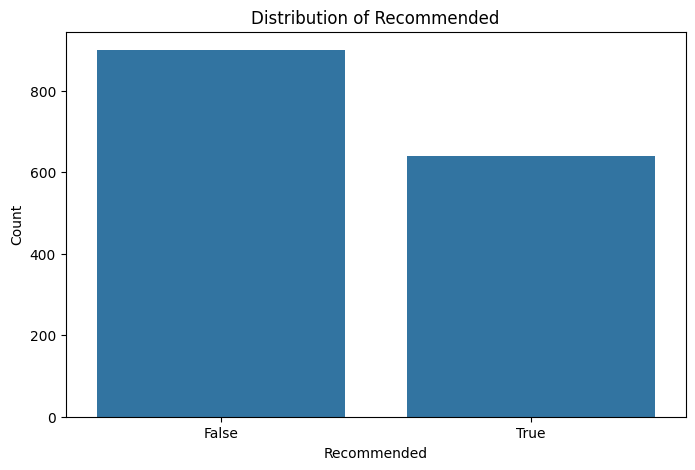

In [35]:
# Countplot for Recommended
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Recommended')
plt.title('Distribution of Recommended')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.show()

c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


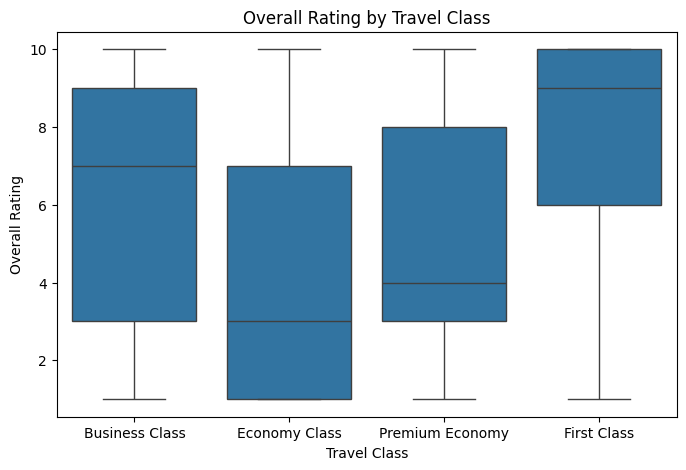

In [36]:
# Average Overall Rating by Travel Class
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Travel Class', y='Overall Rating')
plt.title('Overall Rating by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Overall Rating')
plt.show()

# **Time-Based Analysis**

In [ ]:
# Ensure 'Date Published' is in datetime format
data['Date Published'] = pd.to_datetime(data['Date Published'], errors='coerce')

# Now extract year and month
data['Year'] = data['Date Published'].dt.year
data['Month'] = data['Date Published'].dt.month

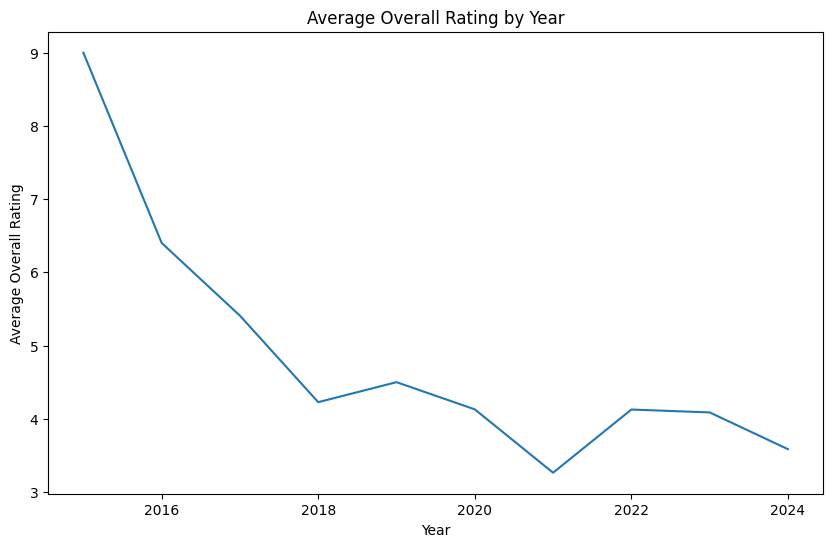

In [40]:
# Average Overall Rating by Year
plt.figure(figsize=(10, 6))
sns.lineplot(data=data.groupby('Year')['Overall Rating'].mean().reset_index(), x='Year', y='Overall Rating')
plt.title('Average Overall Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Overall Rating')
plt.show()

# **Country-Based Analysis**

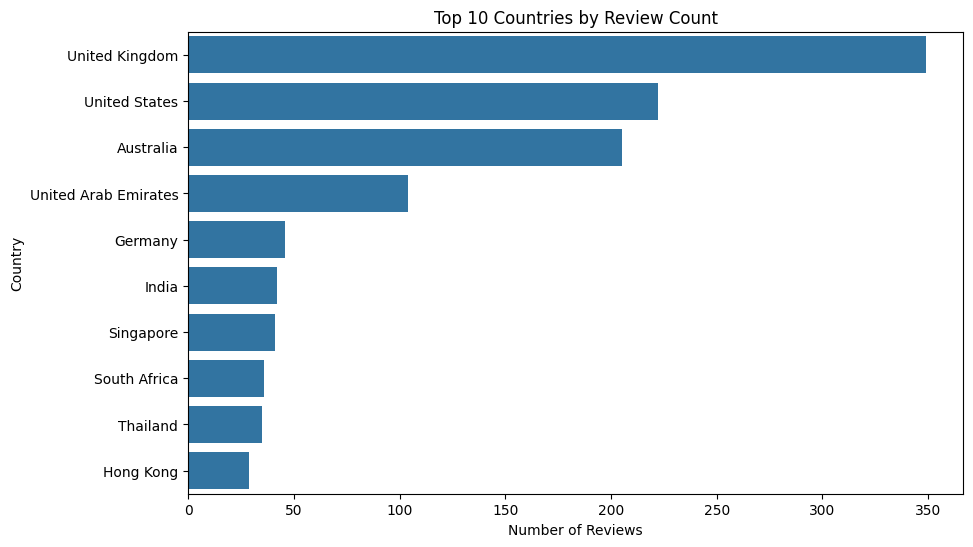

In [41]:
# Top 10 countries by review count
top_countries = data['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()

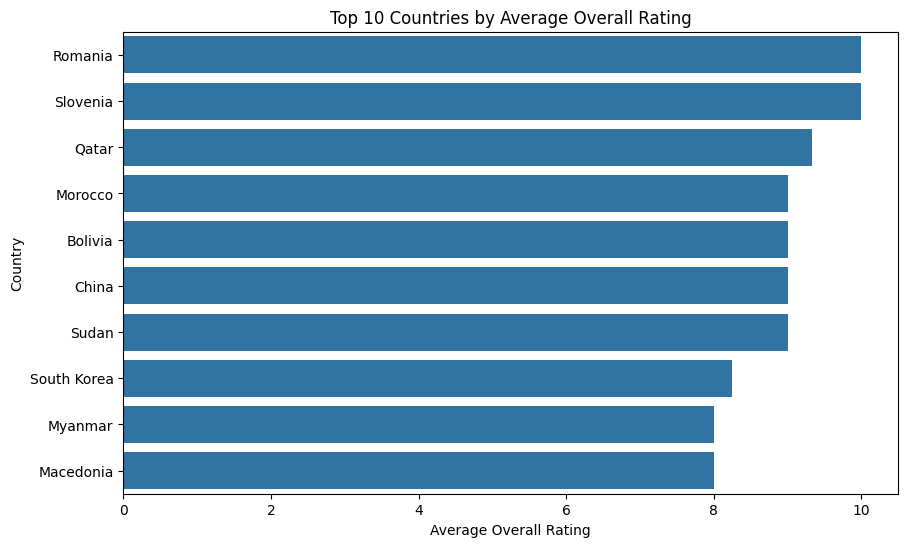

In [42]:
# Average Overall Rating by Country
country_ratings = data.groupby('Country')['Overall Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_ratings.values, y=country_ratings.index)
plt.title('Top 10 Countries by Average Overall Rating')
plt.xlabel('Average Overall Rating')
plt.ylabel('Country')
plt.show()

# Saving the Processed Data

In [44]:
# Save the processed dataset
data.to_csv("Emirates_Airways_Reviews_Processed.csv", index=False)
print("Processed dataset saved successfully.")

Processed dataset saved successfully.
